In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression





In [2]:
# import california housing dataset for different blocks from sklearn
from sklearn.datasets import fetch_california_housing

# Load data
california = fetch_california_housing(as_frame=True)
type(california)

sklearn.utils._bunch.Bunch

Data Set Characteristics:

Number of Instances:
20640

Number of Attributes:
8 numeric, predictive attributes and the target

Attribute Information:
MedInc median income in block group

HouseAge median house age in block group

AveRooms average number of rooms per household

AveBedrms average number of bedrooms per household

Population block group population

AveOccup average number of household members

Latitude block group latitude

Longitude block group longitude

- The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).



In [3]:
df = california.frame

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
target = df['MedHouseVal']
feature_mat = df.drop(columns='MedHouseVal')

In [8]:
feature_mat.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [10]:
df.isnull().sum()  # No missing values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

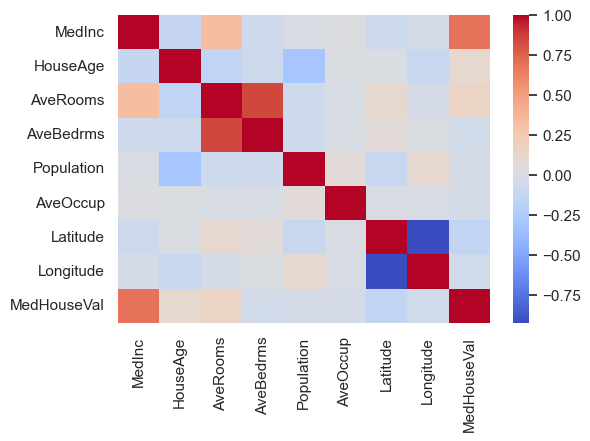

In [12]:
# Correlation matrix

df.corr()
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set_theme()

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [13]:
# Split dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_mat, target)

In [14]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9576,2.0066,16.0,5.689567,1.114504,1361.0,3.463104,37.20,-120.64
5999,3.6359,33.0,5.728195,1.060852,1797.0,3.645030,34.08,-117.75
13355,5.2849,16.0,5.907303,0.977528,1305.0,3.665730,34.02,-117.60
4621,2.2653,40.0,3.547397,1.060080,2149.0,2.869159,34.07,-118.31
6744,4.2312,43.0,5.610108,1.036101,802.0,2.895307,34.12,-118.07
...,...,...,...,...,...,...,...,...
15870,3.0865,52.0,2.928571,0.827381,316.0,1.880952,37.76,-122.41
18940,5.0672,14.0,7.075665,1.018405,3196.0,3.267894,38.27,-122.06
4488,2.0885,36.0,3.964392,1.001484,2883.0,4.277448,34.05,-118.20
13570,4.0481,52.0,6.574219,1.039062,646.0,2.523438,34.14,-117.29


In [15]:
y_train

9576     1.250
5999     1.351
13355    1.604
4621     4.450
6744     2.726
         ...  
15870    2.250
18940    1.713
4488     1.428
13570    0.973
1077     1.163
Name: MedHouseVal, Length: 15480, dtype: float64

In [16]:
# Train LR model

lr = LinearRegression()

In [17]:
model = lr.fit(X_train, y_train)

In [18]:
y_pred = model.predict(X_test)

In [19]:
# MSE

from sklearn.metrics import root_mean_squared_error, r2_score

mse = root_mean_squared_error(y_test, y_pred)
mse

np.float64(0.7316080211826667)

In [20]:
r2 = r2_score(y_test, y_pred)
r2

0.5945800594284405

In [28]:
model.coef_   # Array of coefficients beta0,1,..n

array([ 4.48009958e-01,  9.94769630e-03, -1.26225228e-01,  8.11624340e-01,
       -4.30713804e-06, -4.04817359e-03, -4.24015099e-01, -4.37747626e-01])

In [31]:
coefficients = pd.DataFrame({
    'Feature': feature_mat.columns,
    'Coefficients': model.coef_
})

print(coefficients)

      Feature  Coefficients
0      MedInc      0.448010
1    HouseAge      0.009948
2    AveRooms     -0.126225
3   AveBedrms      0.811624
4  Population     -0.000004
5    AveOccup     -0.004048
6    Latitude     -0.424015
7   Longitude     -0.437748


In [36]:
print(f'intercept = {model.intercept_}')  # intercept alpha

intercept = -37.36573083234854


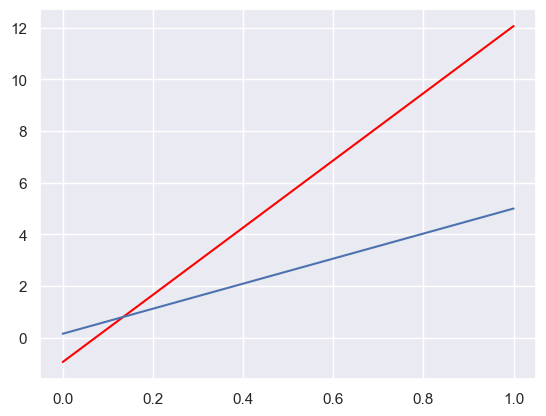

In [42]:
# Visualization of results

# 1. Actual vs Predicted 

plt.plot([y_pred.min(), y_pred.max()], color ='red')
plt.plot([y_test.min(), y_test.max()])


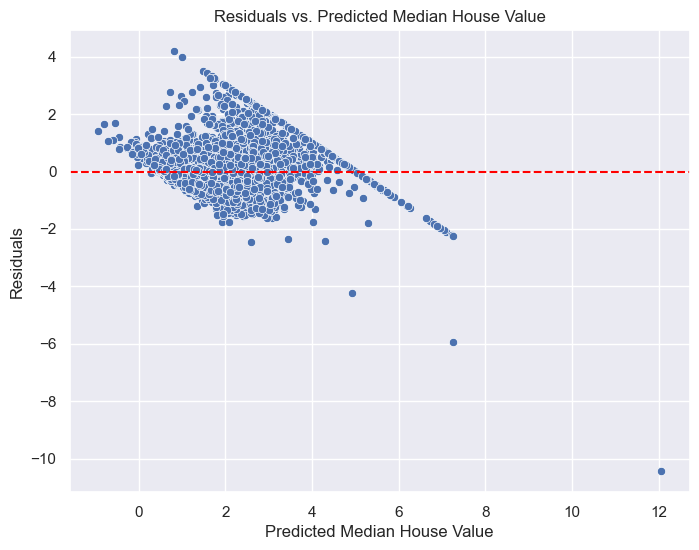

In [43]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Median House Value')
plt.axhline(0, color='red', linestyle='--')
plt.show()


# Multiple Regression



In [52]:
y = [x for x in range(0,10, 2)]

In [53]:
y

[0, 2, 4, 6, 8]

In [54]:
xs = [i  for i in range(0,100)]

In [61]:
for s in range(0,100,10):
    print(xs[s:s+10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
[90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [ ]:
batch_xs = xs[start:start+batch_size]